# Порогова обробка зображень

У даній лабораторній роботі розглянуто наступні приклади порогової обробки зображень:
1. Глобальна порогова обробка
2. Бінарізція методом Оцу
3. Порогова обробка з декількома порогами
4. Адаптивна порогова обробка зображень

### Імпортуємо необхдіні пакети та бібліотеки

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

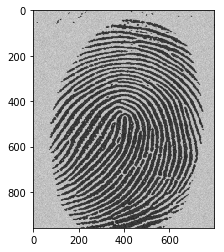

In [13]:
img = cv2.imread("./examples/Fig1038a.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

<h3>Plot input sample image</h3>

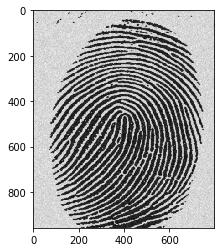

<h2>1. Global threshold</h2>

<h4>1.1 Manually thresholding</h4>

In [11]:
bin_img = img.copy()
threshold = 125

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img[row][col] = 255
        else:
            bin_img[row][col] = 0

<h3>Plot input sample image</h3>

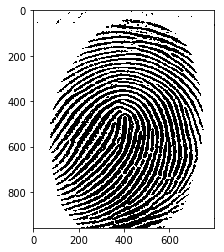

In [12]:
plt.imshow(bin_img, cmap = 'gray'); plt.show();

<h4>1.2 Manually thresholding with PIL</h4>

<h3>Setting parametrs</h3>

In [123]:
source = Image.open("./examples/Fig1038a.tif").convert('RGB')
result = Image.new('RGB', source.size)
brightness = 0.8
separator = 255 / brightness / 2 * 3

<h3>Thresholding</h3>

In [124]:
for x in range(source.size[0]):
    for y in range(source.size[1]):
        r, g, b = source.getpixel((x, y))
        total = r + g + b
        if total > separator:
            result.putpixel((x, y), (255, 255, 255))
        else:
            result.putpixel((x, y), (0, 0, 0))

<h3>Plot input sample image</h3>

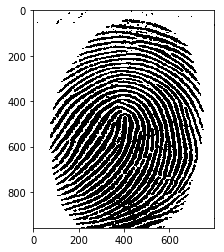

In [125]:
plt.imshow(result, cmap = 'gray'); plt.show();

<h2>2. Otsu’s Binarization</h2>

It automatically calculates a threshold value from image histogram for a bimodal image. 

For this, cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, <b><i>retVal</i></b>. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, we applied global thresholding for a value of 127. In second case, we applied Otsu’s thresholding directly. In third case, we filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

<h3>Read sample image</h3>

In [126]:
img = cv2.imread('./examples/Fig1039a.tif',0)

<h4>Global thresholding</h4>

In [127]:
ret1,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)

<h4>Otsu's thresholding</h4>

In [128]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

<h4>Plot all the images and their histograms</h4>

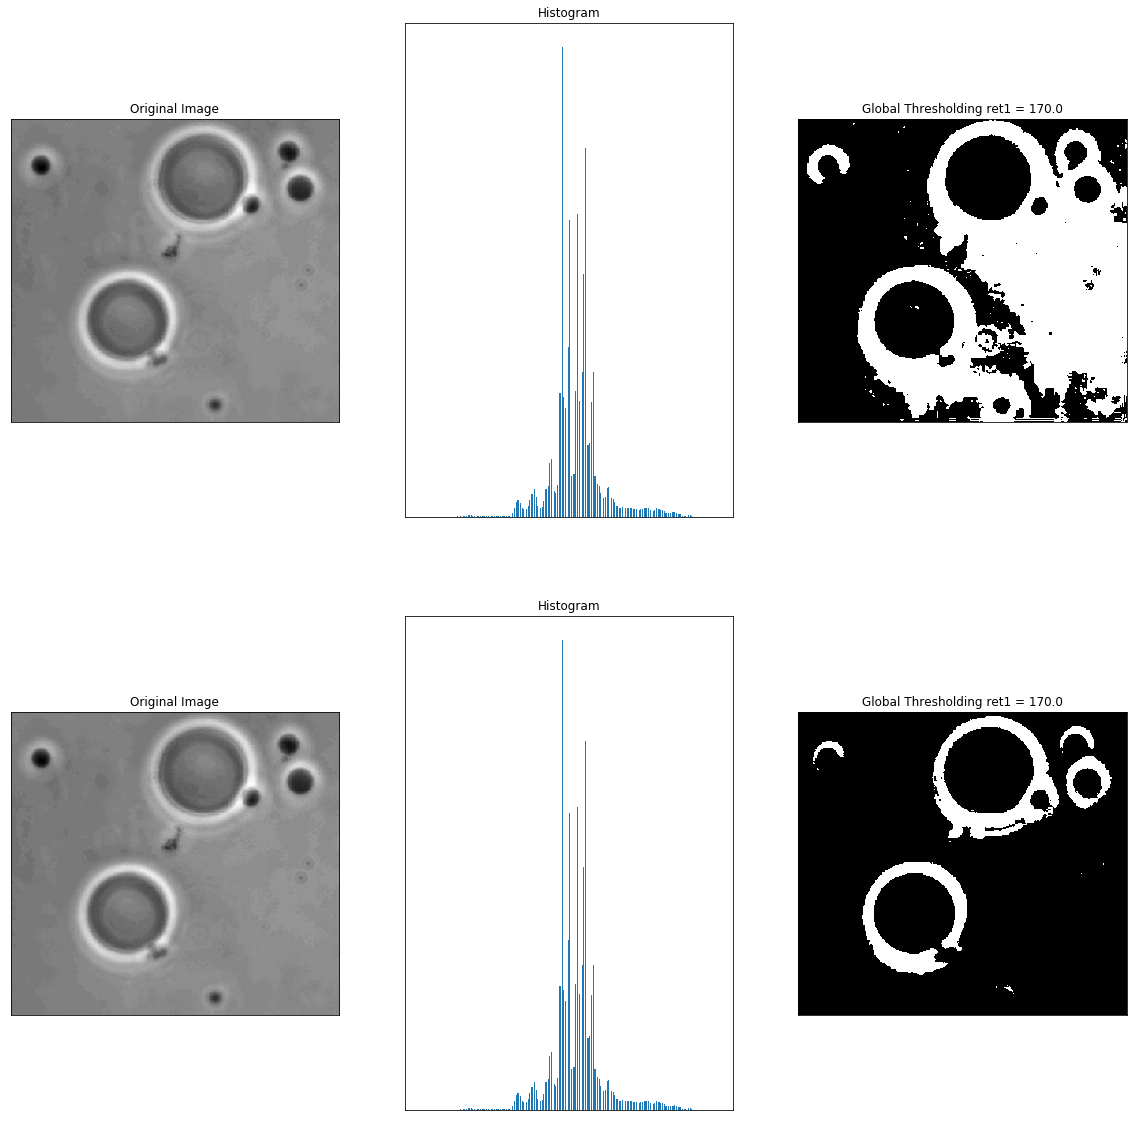

In [137]:
images = [img, 0, th1,
          img, 0, th2,]
titles = ['Original Image','Histogram','Global Thresholding' + ' ret1 = ' + str(ret1),
          'Original Image','Histogram',"Otsu's Thresholding" + ' ret2 = ' + str(ret2)]
plt.figure(figsize=(20,20))

plt.subplot(231),plt.imshow(img,'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.hist(img.ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(th1,'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(img,'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.hist(img.ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(th2,'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

plt.show()

<h4>Another example</h4>

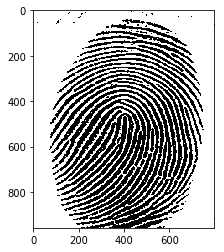

In [138]:
ret,thr = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thr, cmap = 'gray'); plt.show();

<h2>3. Multi thresholding</h2>

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. 

<h3>Read sample image</h3>

In [139]:
img = cv2.imread('./examples/gradient.jpeg',0)

<h4>Thresholding</h4>

In [140]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

<h4>Plot all the images</h4>

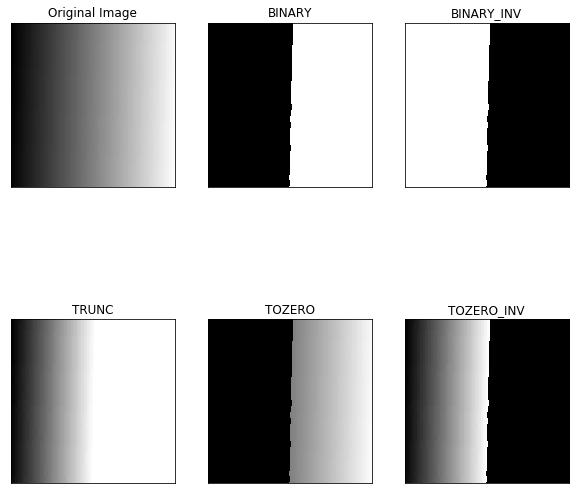

In [141]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

<h2>4. Adaptive Thresholding</h2>

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

<h3>Read sample image</h3>

In [143]:
img = cv2.imread('./examples/Fig1050a.tif',0)

<h4>Thresholding</h4>

In [144]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

<h4>Plot all the images</h4>

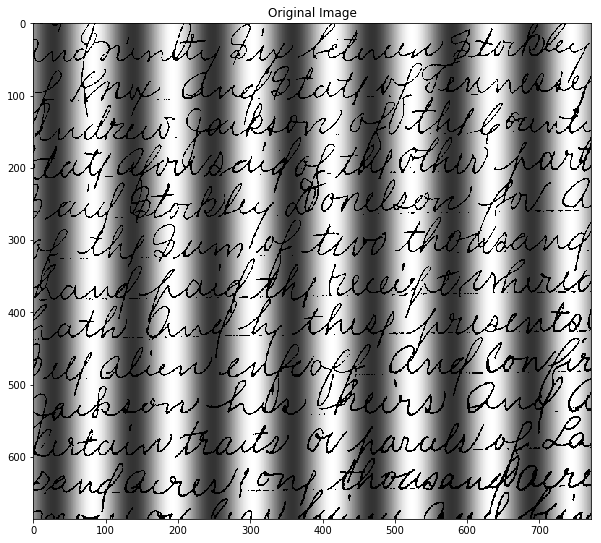

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray'); plt.title('Original Image'); plt.show();

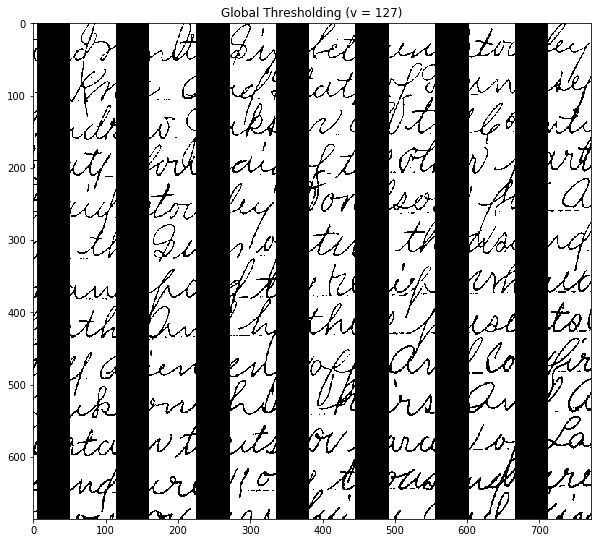

In [146]:
plt.figure(figsize=(10,10))
plt.imshow(th1, cmap = 'gray'); plt.title('Global Thresholding (v = 127)'); plt.show();

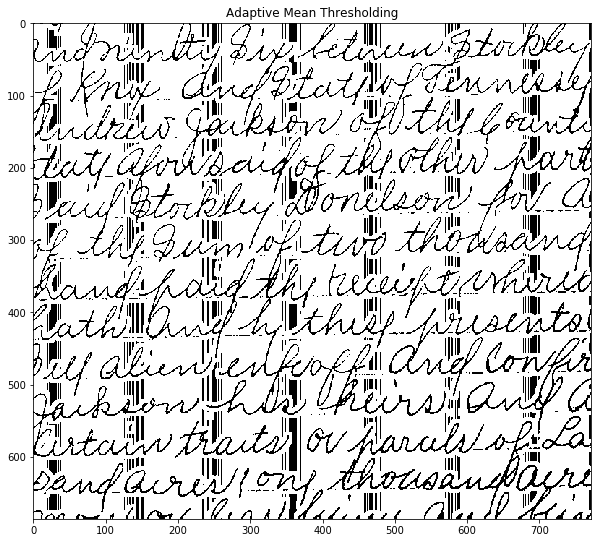

In [147]:
plt.figure(figsize=(10,10))
plt.imshow(th2, cmap = 'gray'); plt.title('Adaptive Mean Thresholding'); plt.show();

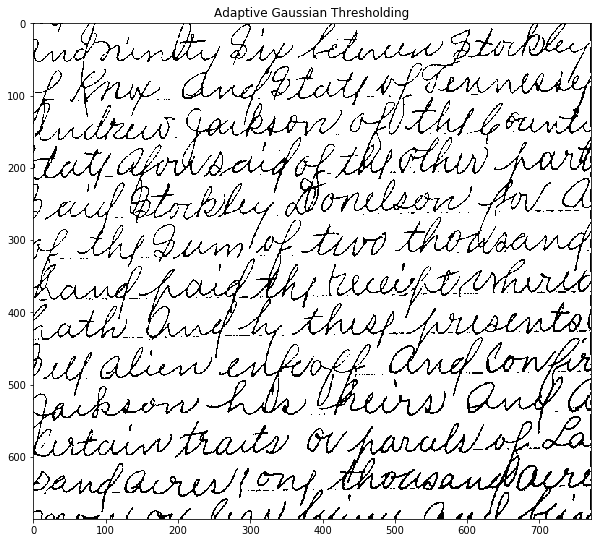

In [148]:
plt.figure(figsize=(10,10))
plt.imshow(th3, cmap = 'gray'); plt.title('Adaptive Gaussian Thresholding'); plt.show();